In [20]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
import h5py
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 256
num_classes = 2
epochs = 12

# input image dimensions
img_rows, img_cols = 128, 128

In [6]:
h5f = h5py.File('dataset.h5', 'r') #open the file 'dataset.h5' in reading mode (like open())

X = h5f['X'] # set the data to X
Y = h5f['Y'] #set the labels to Y

In [11]:
input_shape = (img_rows,img_cols,3)
print('x_train shape:', X.shape)
print(X.shape[0], 'train samples')
print(round(X.shape[0]*.1), 'test samples')

x_train shape: (402, 128, 128, 3)
402 train samples
40 test samples


In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
model.fit(X, Y,
          epochs=epochs,
          verbose=1,
          shuffle = True,
          validation_split=.1)

Train on 361 samples, validate on 41 samples
Epoch 1/12
361/361 [==============================] - 1s 2ms/step - loss: 0.1284 - acc: 0.9501 - val_loss: 0.2693 - val_acc: 0.8780
Epoch 2/12
361/361 [==============================] - 1s 2ms/step - loss: 0.1507 - acc: 0.9446 - val_loss: 0.8713 - val_acc: 0.6585
Epoch 3/12
361/361 [==============================] - 1s 2ms/step - loss: 0.2052 - acc: 0.9169 - val_loss: 0.1615 - val_acc: 0.9268
Epoch 4/12
361/361 [==============================] - 1s 2ms/step - loss: 0.1486 - acc: 0.9391 - val_loss: 0.3675 - val_acc: 0.8780
Epoch 5/12
361/361 [==============================] - 1s 2ms/step - loss: 0.1051 - acc: 0.9668 - val_loss: 0.2085 - val_acc: 0.9024
Epoch 6/12
361/361 [==============================] - 1s 2ms/step - loss: 0.0679 - acc: 0.9723 - val_loss: 0.3313 - val_acc: 0.8780
Epoch 7/12
361/361 [==============================] - 1s 2ms/step - loss: 0.0551 - acc: 0.9861 - val_loss: 0.2264 - val_acc: 0.9268
Epoch 8/12
361/361 [===========

In [28]:
model.predict(X[0].reshape(1,128,128,3))

array([[ 0.99617356,  0.00382648]], dtype=float32)

[ 0.6788348  0.3211652]


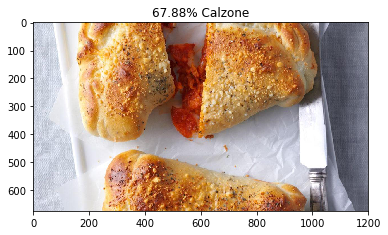

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt #import library for graphing and displaying images

img = cv2.imread("sample.jpg") #read the image and store it into a variable
orig = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

im = cv2.resize(orig,(128,128))#resize it to pass it into the neural network
im = np.reshape(im,(1,128,128,3)) #normalize (divide by 255)
im = im/255

model_out = model.predict([im])[0] #use the trained model to predict what the image is
print(model_out)
pizzaness = round(model_out[1]*100, 2) #give it a pizza-ness score based on the model output
    
if pizzaness >= 50: #if the pizza-ness is greater than 50%, then its a pizza
    str_label = '{}% Pizza'.format(pizzaness)
else: #otherwise its a calzone
    str_label = '{}% Calzone'.format(100-pizzaness)

plt.imshow(orig,interpolation='nearest')
plt.title(str_label) #display the score
plt.show() #display the image